**OBS:** debido a que github esta teniendo errores a la hora de visualizar notebooks que contengan palabras con acentos y con "enies" estas seran reemplazadas por su palabra en ingles o sin acentos.

ejm: 

años = years.

función = funcion.

# IMPORTAR LAS LIBRERIAS Y LOS DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
# cargamos desde nuestro disco los/el dataframe que iremos a analizar
uploaded = files.upload()

Saving Marketing_data.csv to Marketing_data.csv


In [ ]:
df = pd.read_csv('Marketing_data.csv')

Mostramos la columna y el tipo de dato de c/u:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
X_train, X_test = train_test_split(df,
                                  train_size = 0.7,
                                  random_state= 0)

In [ ]:
X_train.shape, X_test.shape

((6265, 18), (2685, 18))

# VISUALIZACION DEL DATASET

## Primer acercamiento a los datos

Empezamos analizando la media, mediana, cuartiles, desviacion estandar, maximos y minimos de cada columna.

Vemos que:

* El balance medio es $1564.

* La frecuencia del balance se actualiza bastante a menudo, en promedio 0.9 aprox.

* El promedio de las compras es $1000.

* El promedio de la frecuencia de las compras está cerca de 0.5.

* El promedio de `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, y `CASH_ADVANCE_FREQUENCY` es en general bajo.

* El promedio del limite de credito es 4500 aprox.

* El porcentaje de pago completo es 15%.

* Los clientes llevan de promedio en el servicio 11 años.

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Histogramas con estimacion de densidad kernel

In [ ]:
n = len(X_train)
m = len(X_train.columns)

print(f"Tenemos una cantidad de {n} filas")
print(f"Tenemos una cantidad de {m} columnas")

Tenemos una cantidad de 6265 filas
Tenemos una cantidad de 18 columnas


**OBS:**

* El campo `Balance_Frequency` nos indica que para muchos usuarios, este se actualiza muy frecuentemente ~1.

* Para el campo `PURCHASES_FREQUENCY`, hay dos grupos diferentes de clientes.

* Para los campos `ONEOFF_PURCHASES_FREQUENCY` y `PURCHASES_INSTALLMENT_FREQUENCY` es mas probable que la gran mayoria de usuarios no paguen todo de golpe ni a plazos.

* Gracias al grafico de la columna `PRC_FULL_PAYMENT` podemos concluir que no es muy probable que los clientes paguen su deuda al completo.

* Gracias al grafico de la columna `TENURE` concluimos que la mayoria de clientes llevan más de 11 años usando el servicio.

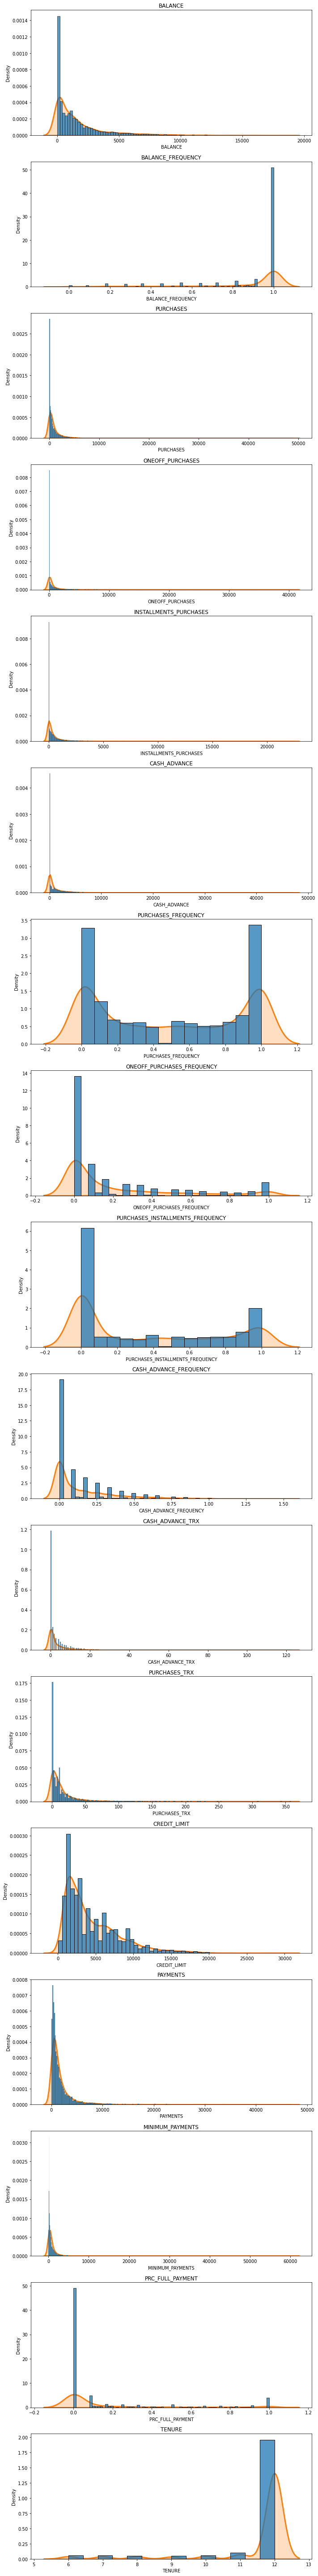

In [ ]:
# dropeamos la columan cust_id ya que no aporta informacion para el sig analisis
X_train = X_train.drop("CUST_ID", axis=1)
X_test = X_test.drop("CUST_ID", axis=1)

fig, axs = plt.subplots(17,1,figsize=(10,80))

# restamos 1 pues no contemplamos la columna cust_id
for i in range(m-1):
  sns.histplot(X_train[X_train.columns[i]], stat="density", ax=axs[i]).set_title(X_train.columns[i])
  sns.kdeplot(X_train[X_train.columns[i]],lw=3, fill=True, ax=axs[i])

plt.tight_layout()

## Heatmap

Podemos observar algunas de las siguientes correlaciones:

* `PURCHASES` tienen una alta correlacion con one-off purchases, `installment purchases`, `purchase transactions`, `credit limit` y `payments`.

* `PURCHASES_FREQUENCY` posee una correlacion muy elevada con `PURCHASES_INSTALLMENT_FREQUENCY`

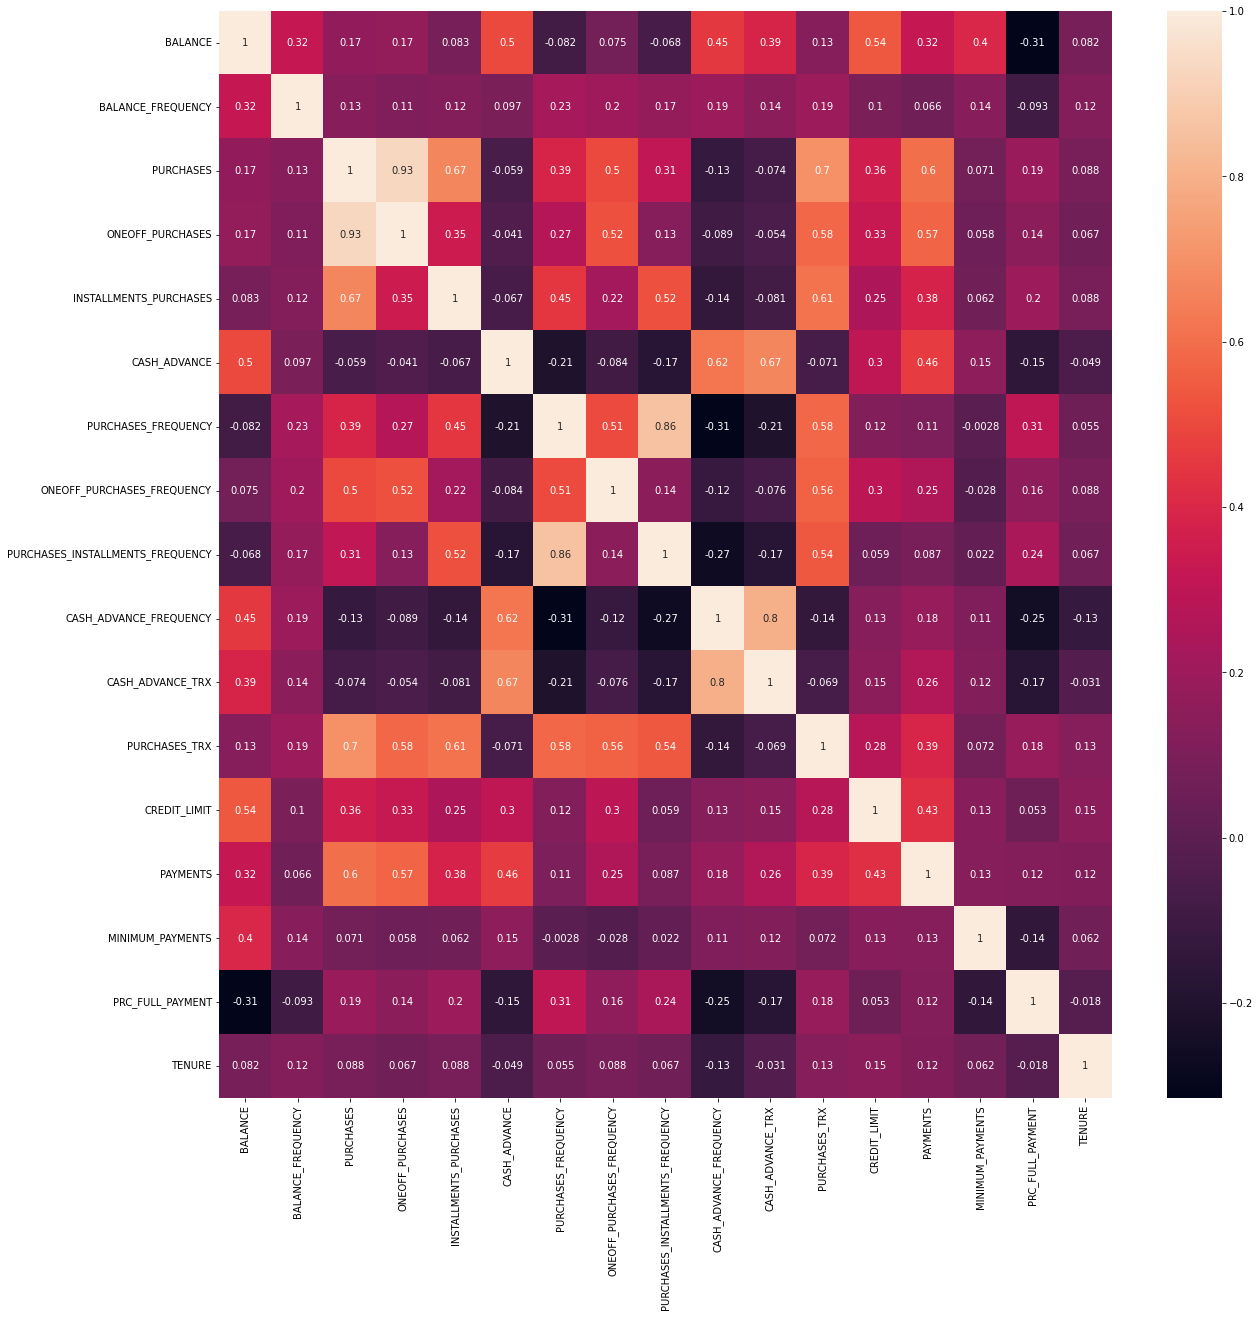

In [ ]:
corr = X_train.corr()

f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True)

# Tratamiento de valores nulos.


Vamos a rellenar los datos faltantes en `CREDIT_LIMIT` y `MINIMUM_PAYMENTS` con sus medias respec. 

Este aprouch se llama mean imputation.

In [ ]:
# buscando columnas con nans
columns_w_missing_data = df.columns[df.isnull().any()].tolist()
columns_w_missing_data

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [ ]:
# obtenemos la media
creditLimit_mean = X_train["CREDIT_LIMIT"].mean()
minimumPayments_mean = X_train["MINIMUM_PAYMENTS"].mean()

# reemplazamos los nans de creditlimit
X_train["CREDIT_LIMIT"] =  X_train["CREDIT_LIMIT"].fillna(creditLimit_mean)
X_test["CREDIT_LIMIT"] =  X_test["CREDIT_LIMIT"].fillna(creditLimit_mean)

# reemplazamos los nans de minimumpayments
X_train["MINIMUM_PAYMENTS"] = X_train["MINIMUM_PAYMENTS"].fillna(minimumPayments_mean)
X_test["MINIMUM_PAYMENTS"] = X_test["MINIMUM_PAYMENTS"].fillna(minimumPayments_mean)

# ENCONTRAR EL NUMERO OPTIMO DE CLUSTERS UTILIZANDO EL METODO DEL CODO

In [ ]:
# escalamos el dataset
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
scores_1 = []
range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i)

  cluster_labels = kmeans.fit_predict(X_train_scaled)  
  scores_1.append(kmeans.inertia_) # inertia == WCSS

Graficamos los WCSS

Con el grafico podemos ver que con 4 clusters es donde se forma el "codo" de la curva.
Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
Elegimos un numero de clusters igual a 4-8.

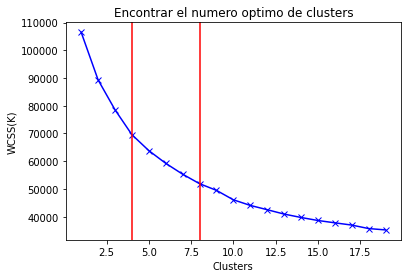

In [ ]:
plt.plot(range_values, scores_1, color= "b", marker="x", linestyle="-")
plt.axvline( x=4, color="r")
plt.axvline( x=8, color="r")
plt.title("Encontrar el numero optimo de clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(K)")
plt.show()

# APLICAR EL METODO DE K-MEANS.

El algoritmo K-means tiene como objetivo elegir centroides que minimicen la inercia, o el criterio de suma de cuadrados dentro del grupo:

<h2>$∑_{i}^n min_{\mu_{j}\in C}(\left\|x_{i} - \mu_{j} \right\|^2)$<h2/>




Declaramos el modelo y lo entrenamos con los datos escalados.

In [ ]:
kmeans = KMeans(4)
kmeans.fit(X_train_scaled)

labels = kmeans.labels_

In [ ]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[X_train.columns])
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.252584,-0.359464,-0.334724,-0.224790,-0.397183,-0.167535,-0.810264,-0.392922,-0.723102,-0.080508,-0.150180,-0.486286,-0.326188,-0.250252,-0.123908,-0.267325,-0.051258
1,0.888726,0.478816,2.923313,2.592214,2.202844,-0.149820,1.157735,1.864683,1.068167,-0.325506,-0.169657,2.937884,1.407631,1.829845,0.364062,0.478139,0.340710
2,1.495171,0.387685,-0.230728,-0.163901,-0.255935,1.680668,-0.498614,-0.209133,-0.445912,1.766503,1.650161,-0.293525,0.861573,0.598550,0.574761,-0.413701,-0.064215
3,-0.332285,0.228004,0.096378,-0.013380,0.271614,-0.362302,0.976609,0.294121,0.867361,-0.471688,-0.369671,0.294629,-0.094316,-0.147639,-0.099052,0.395635,0.038512


Para entender mejor estos valores, vamos a aplicar la transformacion inversa del escalado.

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns=[X_train.columns])
cluster_centers  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1033.142143,0.790709,264.613978,208.034603,56.846238,624.865337,0.162477,0.084574,0.074460,0.119745,2.224218,2.771470,3300.171211,986.822602,566.109760,0.074605,11.424362
1,3414.847699,0.989886,7330.256033,5054.931475,2277.291770,662.495193,0.953174,0.760099,0.784317,0.070790,2.095082,84.062295,9623.606557,6993.995377,1647.021463,0.292308,11.960656
2,4680.389599,0.968233,490.148047,312.799570,177.473378,4550.798761,0.287691,0.139567,0.184307,0.488814,14.160934,7.347666,7632.069466,3438.103280,2113.744486,0.031858,11.406634
3,866.820842,0.930293,1199.536407,571.783639,628.004350,211.142416,0.880402,0.290152,0.704740,0.041580,0.768938,21.310622,4145.835439,1283.162222,621.169039,0.268214,11.547186


Podemos hacer el siguiente analisis producto de los histogramas y la info previa de c/cluster:

* Primer cluster de Clientes: Estos son los clientes que pagan una menor cantidad de cargos por intereses, tienen cuidado con su dinero, este cluster posee el balance mas bajo (866) y un anticipo en efectivo bajo tmb (210), con un porcentaje de pago completo del 27%.

* Segundo cluster de Clientes: Estos clientes usan tarjeta de credito como prestamo (sector más lucrativo), poseen un saldo mas alto (4600) y un anticipo en efectivo alto tmb (4500), tienen una baja frecuencia de compra y una alta frecuencia de anticipo en efectivo del 0.48, poseen tmb transacciones de anticipo en efectivo altas (14) y un bajo porcentaje de pago (3%).

* Tercer cluster de Clientes: Tienen un limite de credito alto $ 9600 y porcentaje mas alto de pago completo, estos son un objetivo para aumentar el límite de credito y aumentar los habitos de gasto.

* Cuarto cluster de Clientes: estos son clientes con baja antigüedad (7 años), poseen un saldo bajo.

In [ ]:
# concatenamos las etiquetas de los clusters con el dataset original.
df_clusters = pd.concat([X_train, pd.DataFrame({"Cluster": labels})], axis=1)

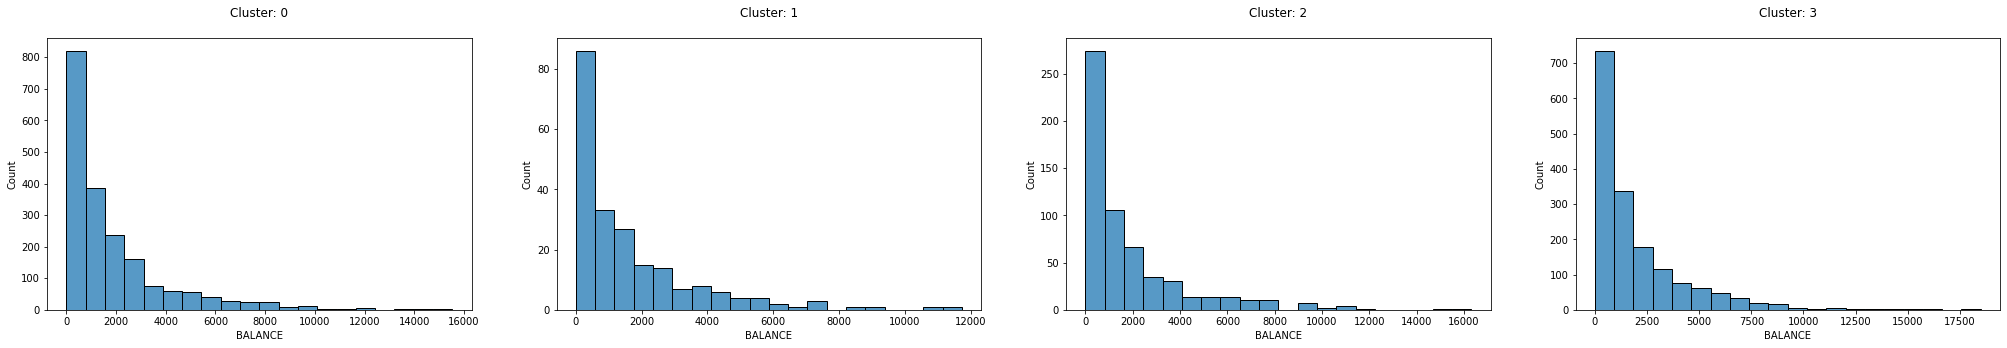

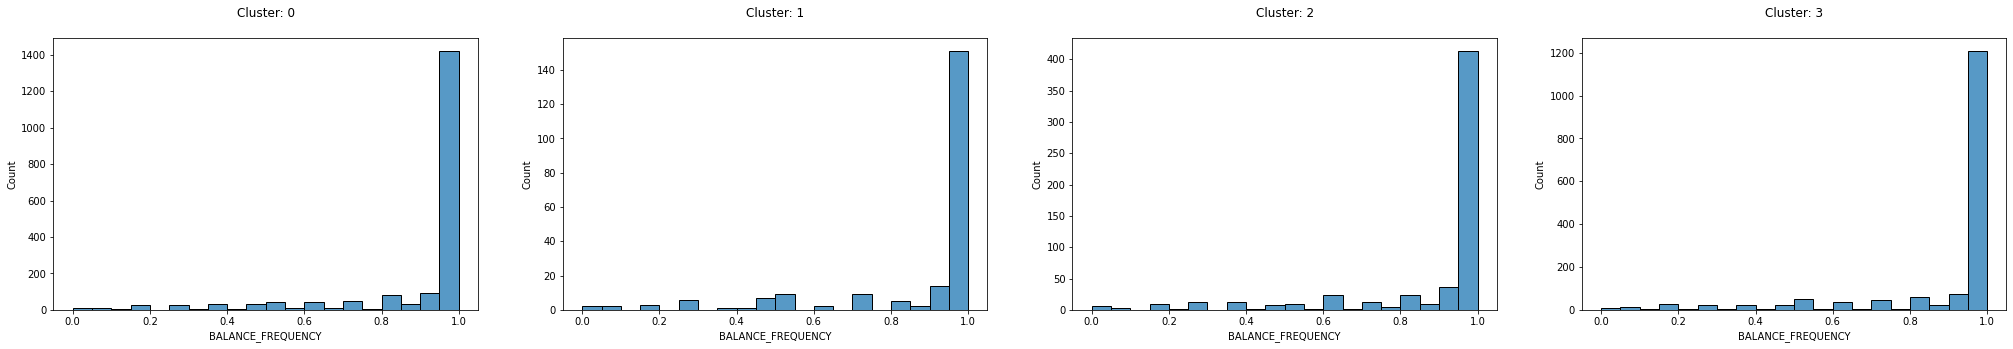

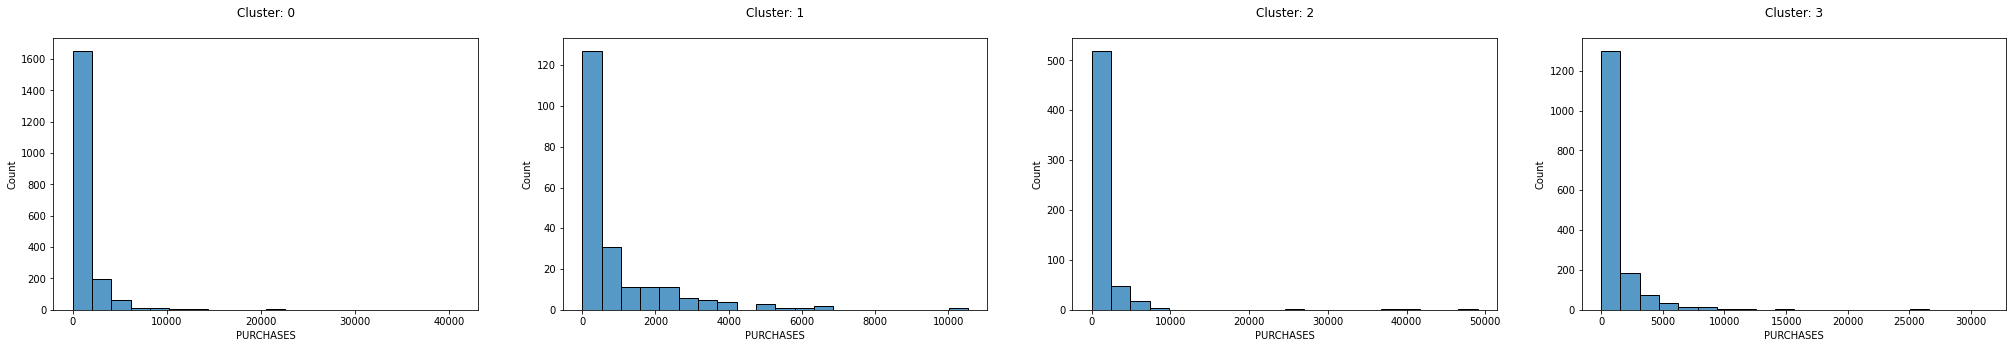

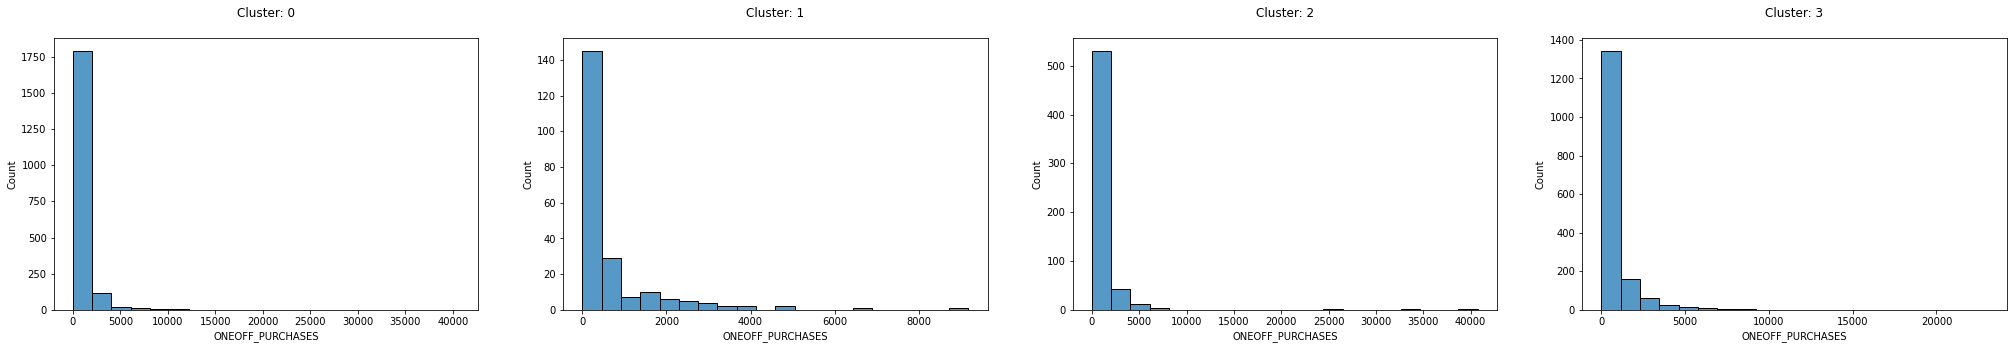

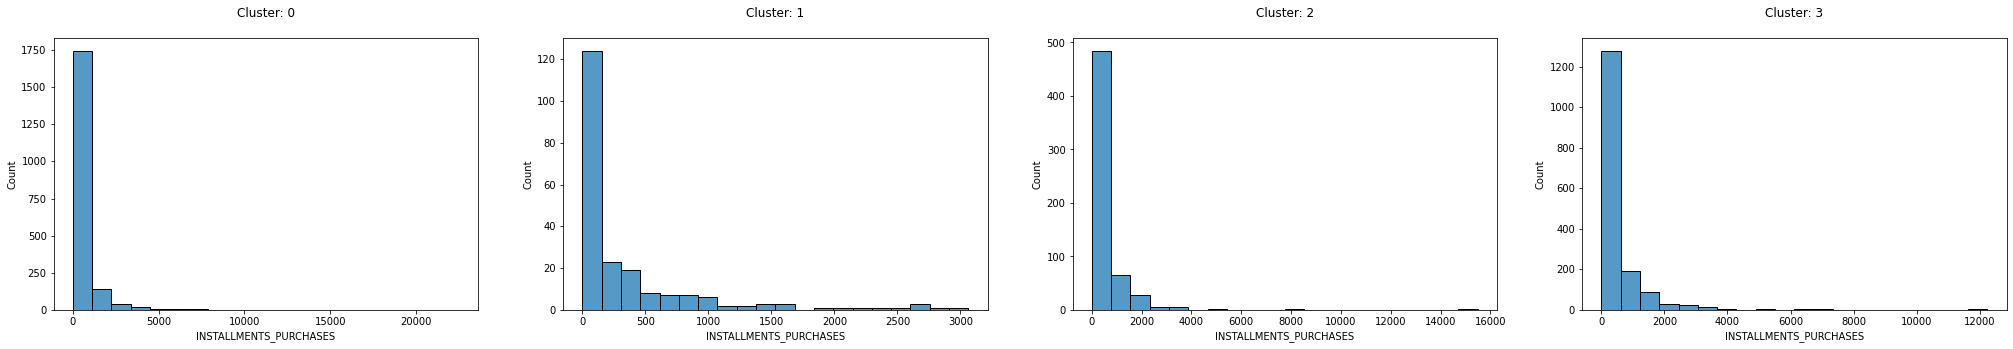

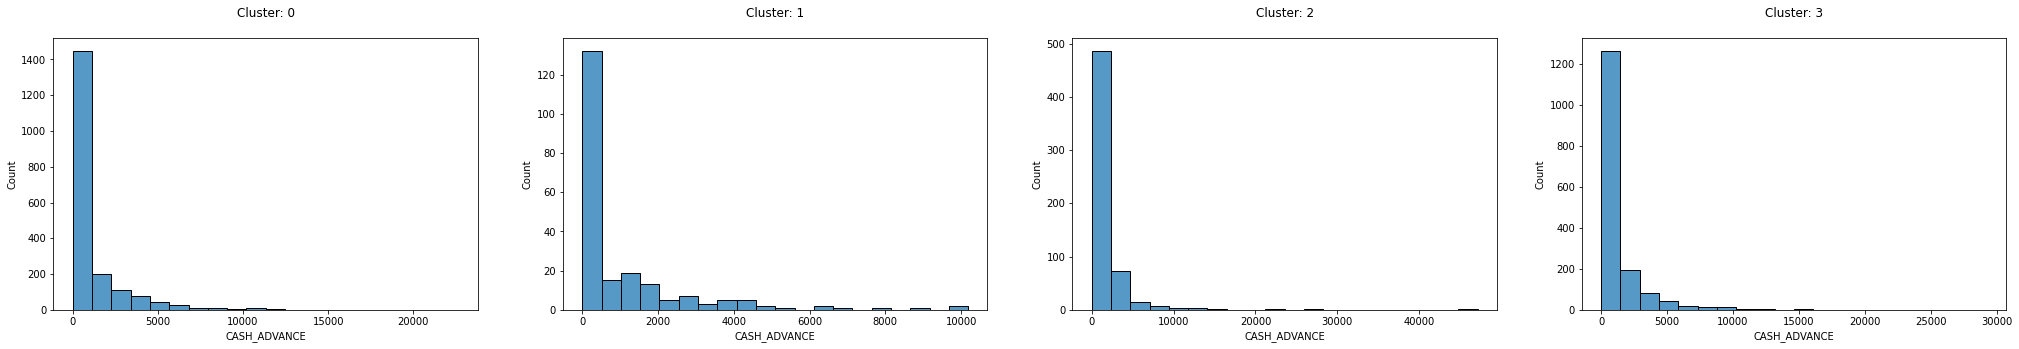

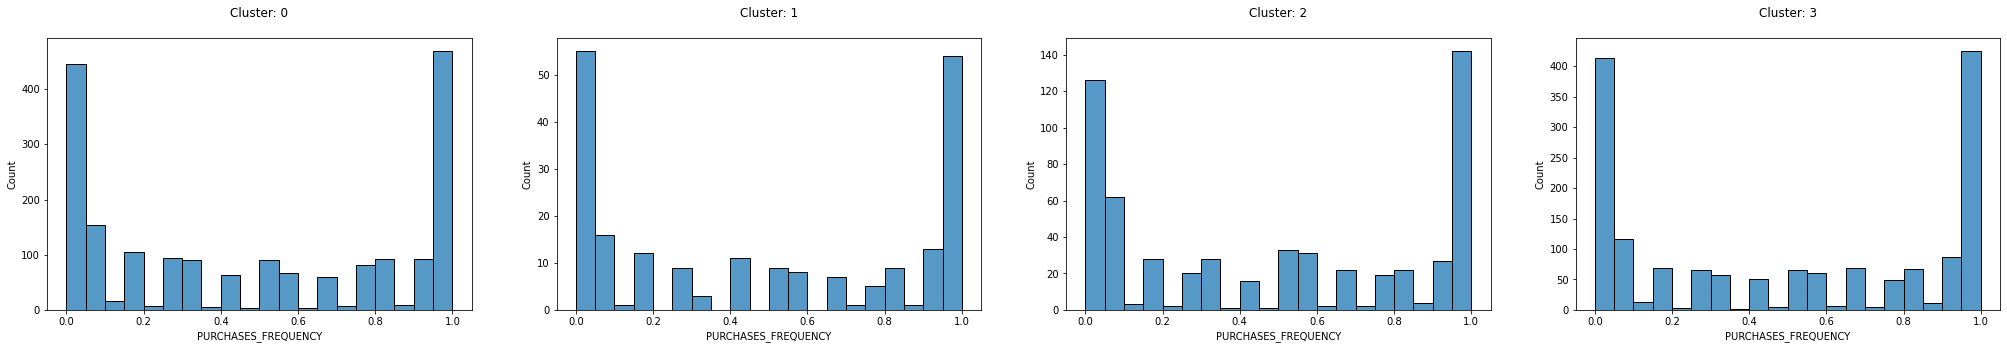

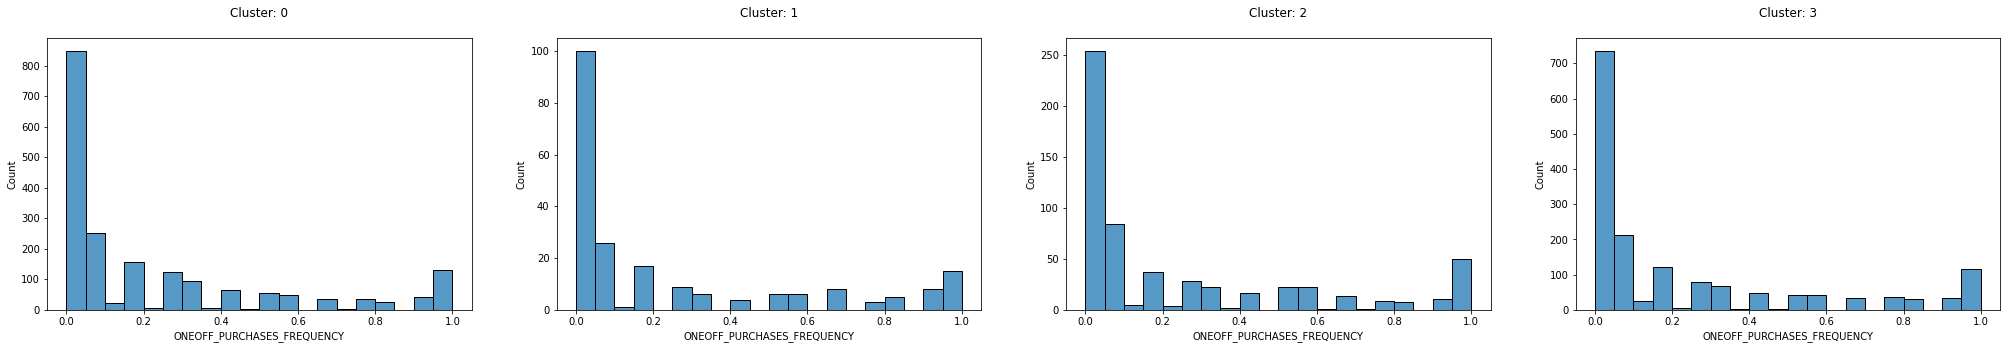

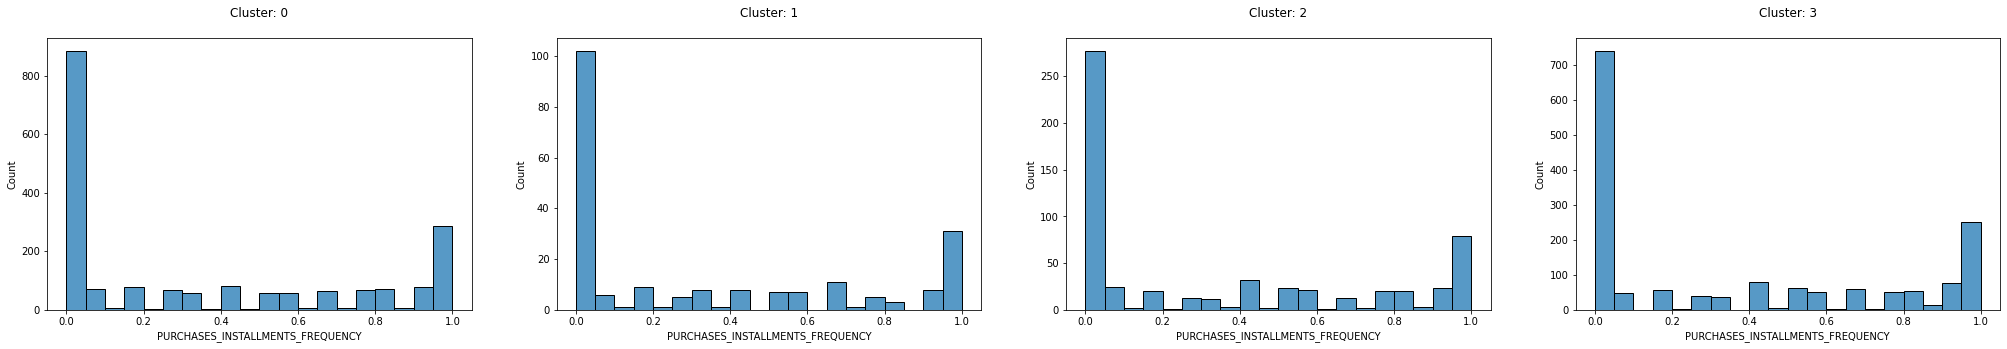

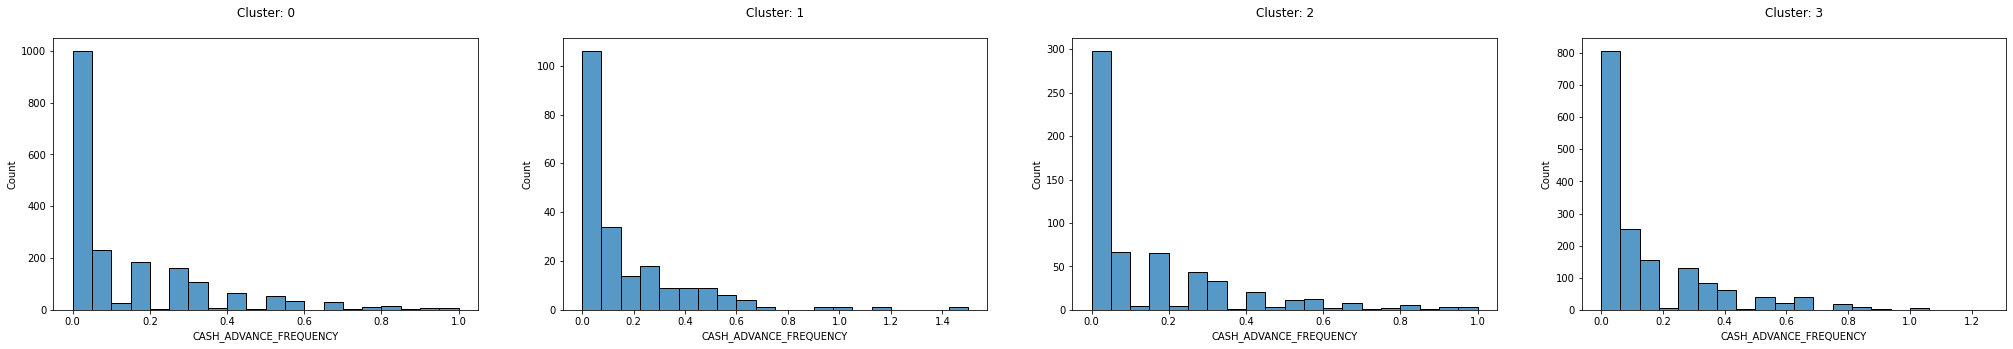

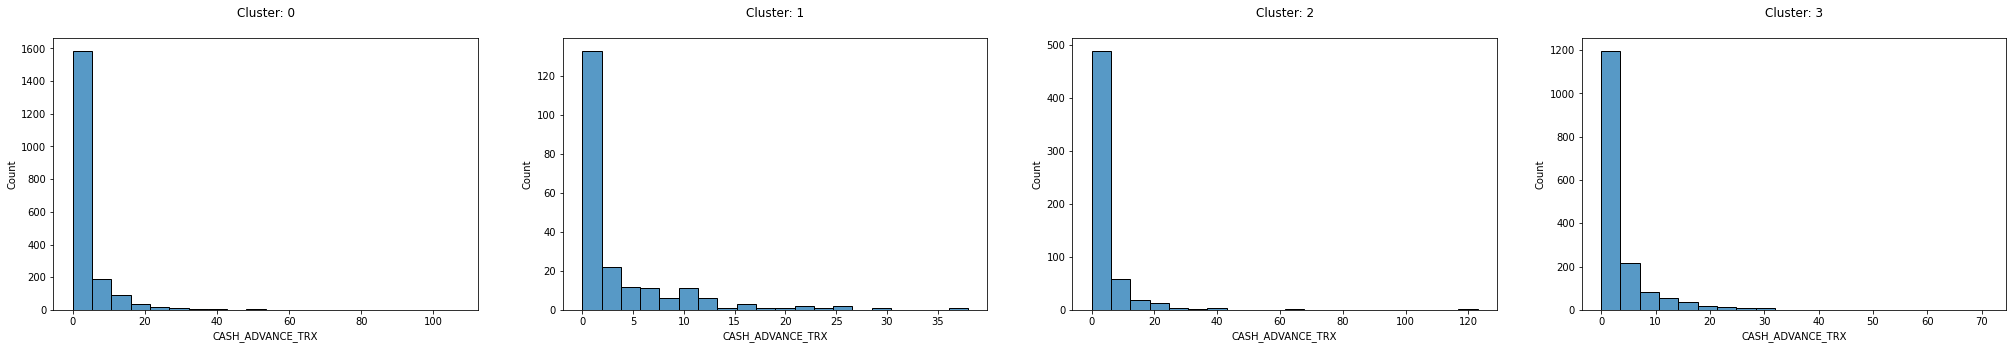

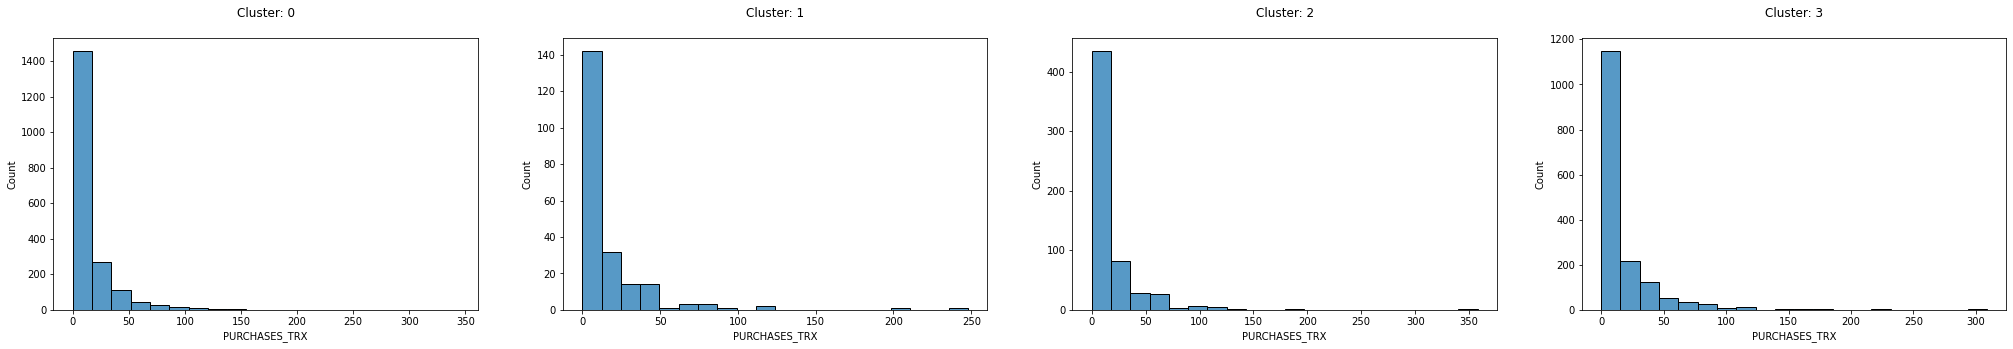

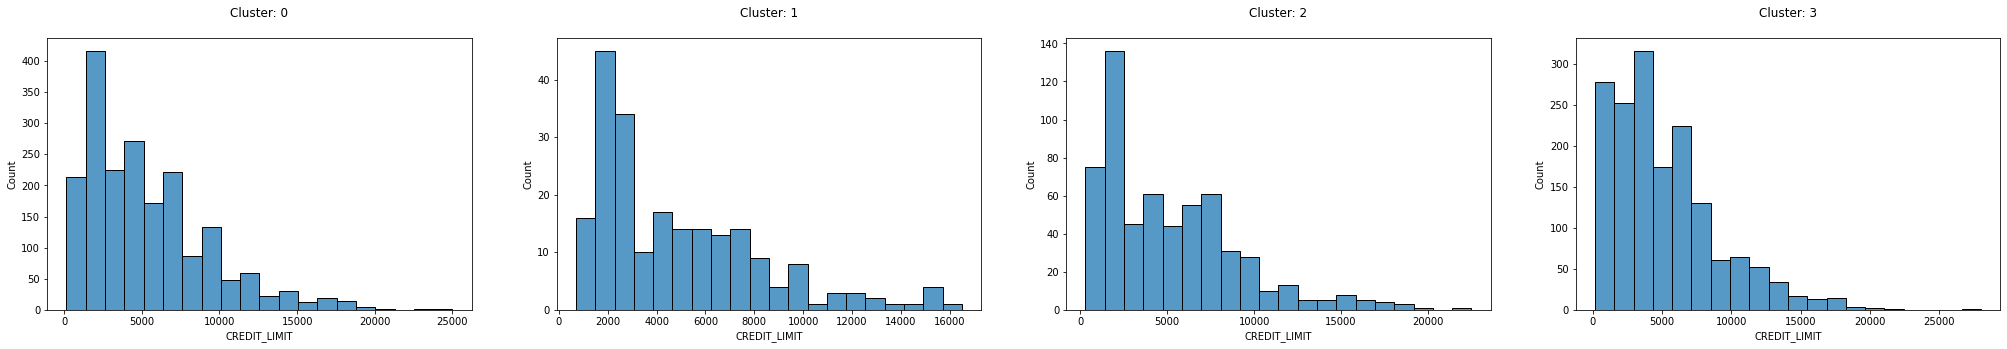

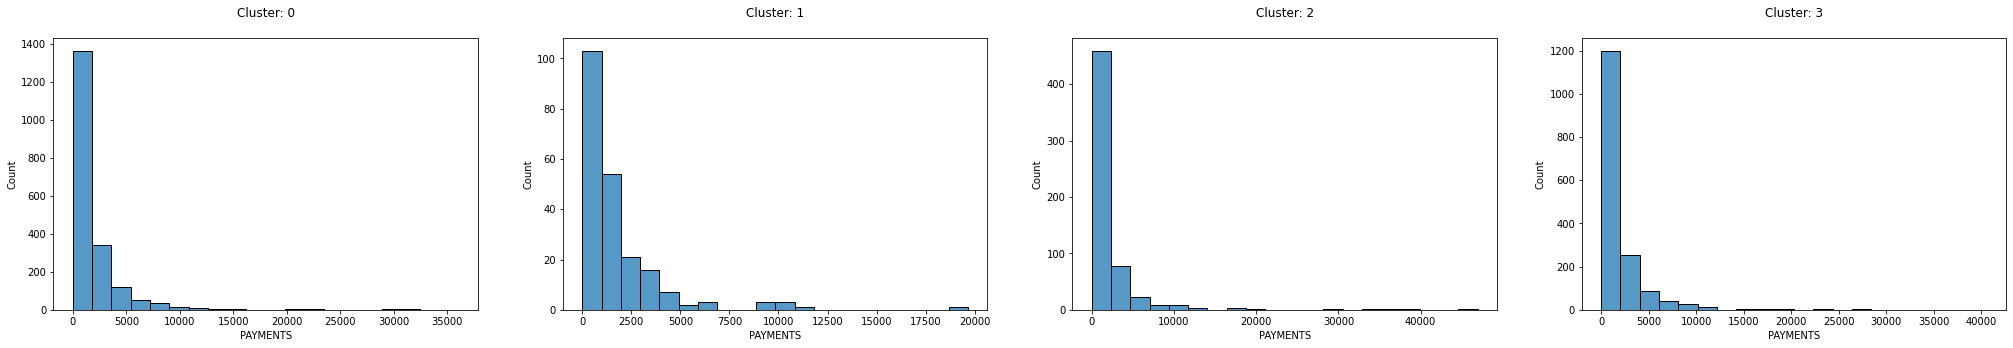

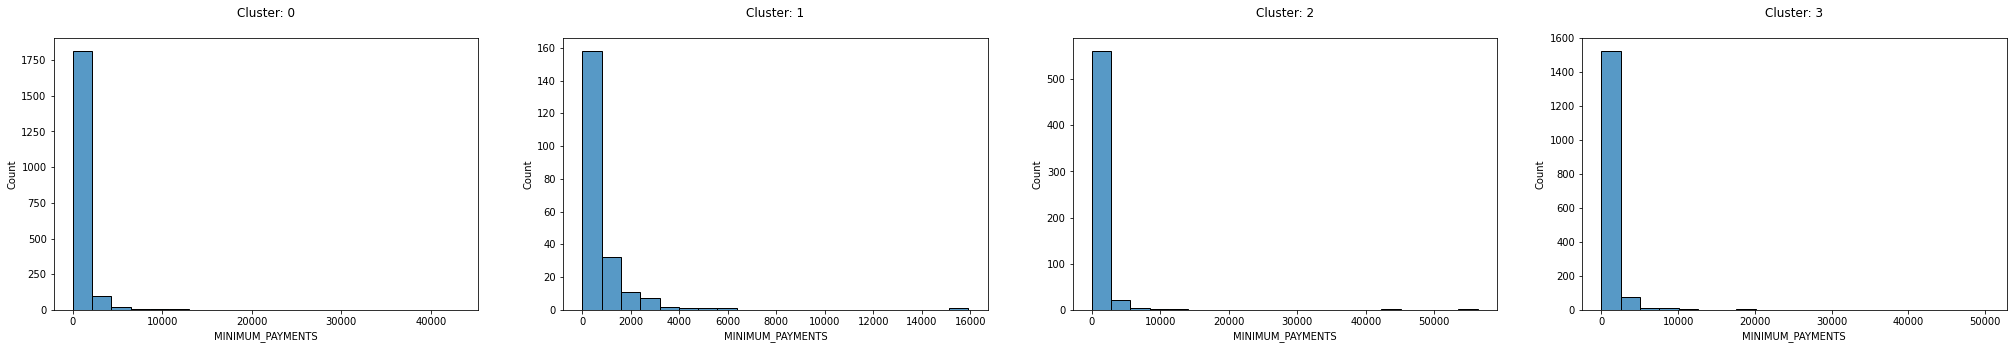

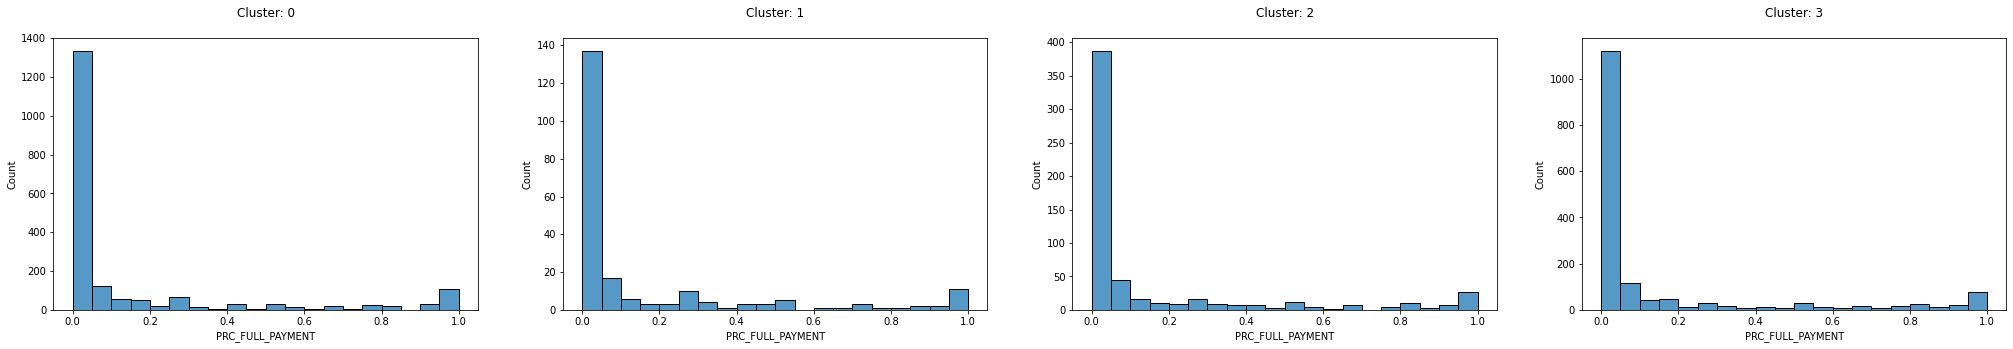

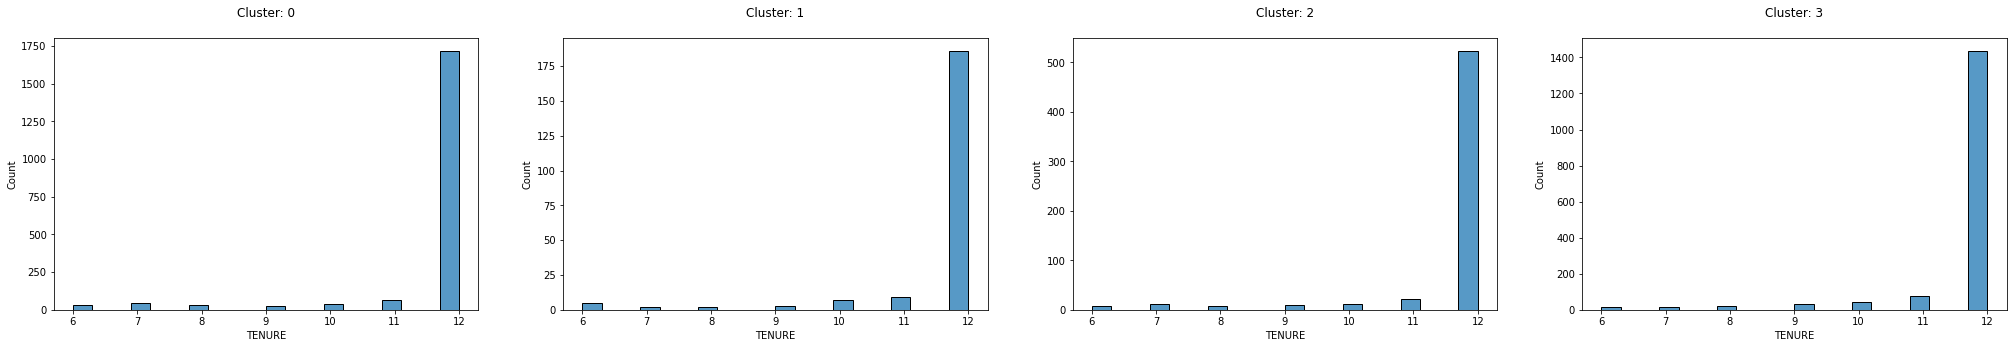

In [ ]:
for i in X_train.columns:
  fig, axs = plt.subplots(1,4, figsize=(35,5))
  for j in range(4):
    cluster = df_clusters[df_clusters["Cluster"]==j]
    sns.histplot(cluster[i],bins=20, ax=axs[j])
    axs[j].title.set_text(f"Cluster: {j}\n")

# APLICAR ANALISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

PCA se utiliza para descomponer un conjunto de datos multivariante en un conjunto de componentes ortogonales sucesivas que explican una cantidad maxima de la varianza.

Obtenemos las componentes principales:

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(X_train_scaled)
principal_comp

array([[-1.6400452 , -0.26318104],
       [ 2.01524469,  2.0879384 ],
       [-0.36206809,  2.04699696],
       ...,
       [ 0.08684209, -1.48469431],
       [-1.20354052,  5.09527206],
       [ 1.12560454, -0.99590322]])

Creamos un dataframe con las dos componentes.


In [ ]:
pca_df = pd.DataFrame(principal_comp, columns=["pca1", "pca2"])
pca_df.head(10)

,pca1,pca2
0,-1.640045,-0.263181
1,2.015245,2.087938
2,-0.362068,2.046997
3,0.918980,2.450250
4,0.141626,-1.329163
5,0.388798,5.002199
6,-0.076748,3.812802
7,0.119412,-1.743001
8,-0.237961,3.387426
9,-0.125101,-2.194582


Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales.



In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis=1)

Podemos visualizar claramente los 4 grupos de clientes que poseemos.

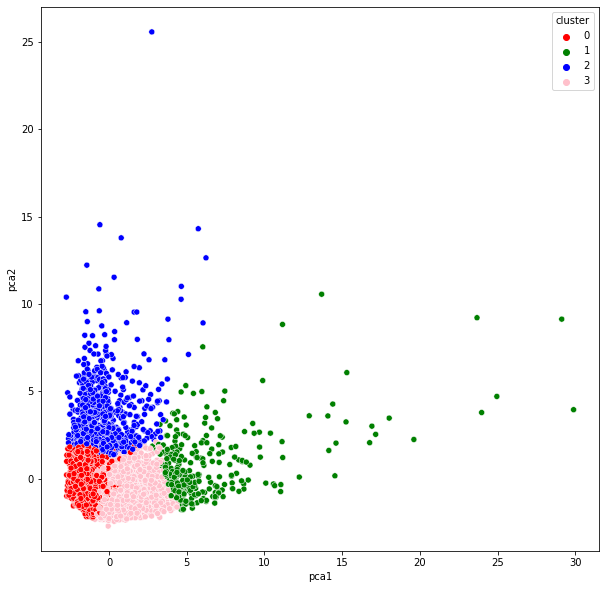

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y ="pca2",hue="cluster", palette=["red", "green", "blue", "pink"],data=pca_df)